# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [72]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [73]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [74]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [75]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [3,50,218]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,13265,1196,4221,6404,507,1788
1,6269,1095,1980,3860,609,2162
2,18,7504,15205,1285,4797,6372


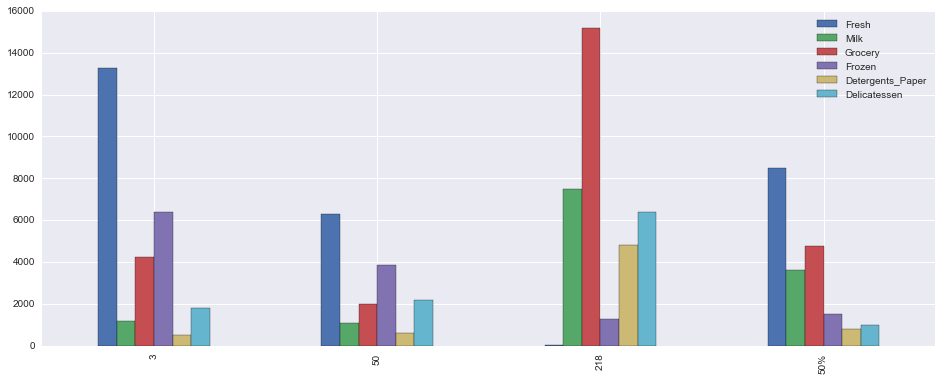

In [76]:
import seaborn as sns
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop=True)
samples_bar = samples.append(data.describe().loc['50%'])
# samples_bar = samples.append(data.describe().loc['mean'])
samples_bar.index = indices + ['50%'] 

_ = samples_bar.plot(kind='bar', figsize=(16,6))

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

 

### 1. 

Spending on Fresh，Frozen and Delicatessen of Sample_0 is much more than the median value while detergents_paper purchase cost extremely below avergage comparing with the 25% value.The cost of grocery is on the mean value.

### According to these evidence,the customer can be considered as a food store or supermarket.


### 2. 
The spending on Frozen and Delicatessen is much less than the median value in corresponding category.
The cost of Grocery is much more than the median value and near to 75% part.

### According to these evidence, the customer is  somehow considered as a grocery store .

### 3.

It's a cafe or restaurant I considered. Because the the spending on Milk , Grocery , Detergents_Paper and Delicatessen are much than the 75% value of the data while fresh cost less than the average value. It is much likely a place for eating where people need food ,milk and paper. 

### According to these evidence, the customer is  somehow considered as a cafe or restaurant .

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [77]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Detergents_Paper'], axis = 1)
target_data = data['Detergents_Paper']

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, target_data, test_size = 0.25, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train,y_train)
# TODO: Report the score of the prediction using the testing set

score = regressor.score(X_test,y_test)
score

0.72865518125414541

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

In [78]:
from sklearn.metrics import r2_score

print 'Calcaulating the r2_score of  Fresh and the rest:\n'


print 'R2_Score of Fresh and Milk is {}'.format(r2_score(data['Fresh'], data['Milk']))
print 'R2_Score of Fresh and Grocery is {}'.format(r2_score(data['Fresh'], data['Grocery']))
print 'R2_Score of Fresh and Frozen is {}'.format(r2_score(data['Fresh'], data['Frozen']))
print 'R2_Score of Fresh and Detergents_Paper is {}'.format(r2_score(data['Fresh'], data['Detergents_Paper']))
print 'R2_Score of Fresh and Delicatessen is {}\n'.format(r2_score(data['Fresh'], data['Delicatessen']))
##...	Fresh	Milk	Grocery	Frozen	Detergents_Paper	Delicatessen


print 'Calcaulating the r2_score of Milk and the rest: \n\n'


print 'R2_Score of Milk and Grocery is {}'.format(r2_score(data['Milk'], data['Grocery']))
print 'R2_Score of Milk and Frozen is {}'.format(r2_score(data['Milk'], data['Frozen']))
print 'R2_Score of Milk and Detergents_Paper is {}'.format(r2_score(data['Milk'], data['Detergents_Paper']))
print 'R2_Score of Milk and Delicatessen is {}\n'.format(r2_score(data['Milk'], data['Delicatessen']))


print 'Calcaulating the r2_score of Grocery and the rest:\n'

print 'R2_Score of Grocery and Frozen is {}'.format(r2_score(data['Grocery'], data['Frozen']))
print 'R2_Score of Grocery and Detergents_Paper is {}'.format(r2_score(data['Grocery'], data['Detergents_Paper']))
print 'R2_Score of Grocery and Delicatessen is {}\n'.format(r2_score(data['Grocery'], data['Delicatessen']))


print 'Calcaulating the r2_score of Frozen and the rest:\n'

print 'R2_Score of Frozen and Detergents_Paper is {}'.format(r2_score(data['Frozen'], data['Detergents_Paper']))
print 'R2_Score of Frozen and Delicatessen is {}\n'.format(r2_score(data['Frozen'], data['Delicatessen']))



print 'Calcaulating the r2_score of Detergents_Paper and Delicatessen:\n'

print 'R2_Score of Detergents_Paper and Delicatessen is {}'.format(r2_score(data['Detergents_Paper'], data['Delicatessen']))


Calcaulating the r2_score of  Fresh and the rest:

R2_Score of Fresh and Milk is -0.464406309333
R2_Score of Fresh and Grocery is -0.685139514038
R2_Score of Fresh and Frozen is -0.381306456538
R2_Score of Fresh and Detergents_Paper is -0.740021575866
R2_Score of Fresh and Delicatessen is -0.628195208427

Calcaulating the r2_score of Milk and the rest: 


R2_Score of Milk and Grocery is 0.132212602468
R2_Score of Milk and Frozen is -0.406123464674
R2_Score of Milk and Detergents_Paper is 0.28142109871
R2_Score of Milk and Delicatessen is -0.171168213548

Calcaulating the r2_score of Grocery and the rest:

R2_Score of Grocery and Frozen is -0.566256258357
R2_Score of Grocery and Detergents_Paper is 0.390838708261
R2_Score of Grocery and Delicatessen is -0.424439707784

Calcaulating the r2_score of Frozen and the rest:

R2_Score of Frozen and Detergents_Paper is -1.22444056036
R2_Score of Frozen and Delicatessen is 0.0149710381

Calcaulating the r2_score of Detergents_Paper and Delicates

In [79]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

def decision_tree_test(A):
    score_list = []
    new_data = data.drop([A], axis = 1)
    target_data = data[A]
    X_train, X_test, y_train, y_test = train_test_split(new_data, target_data, test_size = 0.25, random_state = 0)
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train,y_train)
    score = regressor.score(X_test, y_test)
    score_list.append(score)
    print " The score of the prediction for {} is {}".format(A, score)

for i in list(data.keys()):
    decision_tree_test(i)

 The score of the prediction for Fresh is -0.252469807688
 The score of the prediction for Milk is 0.365725292736
 The score of the prediction for Grocery is 0.602801978878
 The score of the prediction for Frozen is 0.253973446697
 The score of the prediction for Detergents_Paper is 0.728655181254
 The score of the prediction for Delicatessen is -11.6636871594


## Answer to Q2:

I will choose **detergents_paper** as the target feature.

And the reported prediction score by decision tree method is 0.7286 which is the highest marks in the test turn.

The highest R2_Score is 0.3908 between Grocery and Detergents_Paper.

#### So I don't think detergents_paper is very  necessary for identifying customers' spending habits.

### Reason below:
According to the r2 score definition,  Grocery can replace Detergents_paper in some degree.



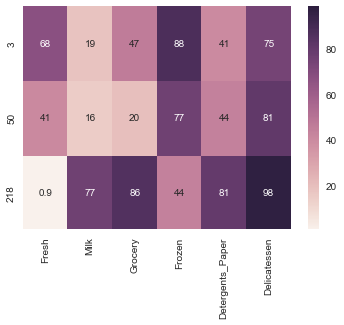

In [80]:
## Seaborn.heatmap which will discover the relationship between each feature.
import seaborn as sns

percentiles = data.rank(pct=True)

percentiles = 100*percentiles.round(decimals=3)

percentiles = percentiles.iloc[indices]

target = sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

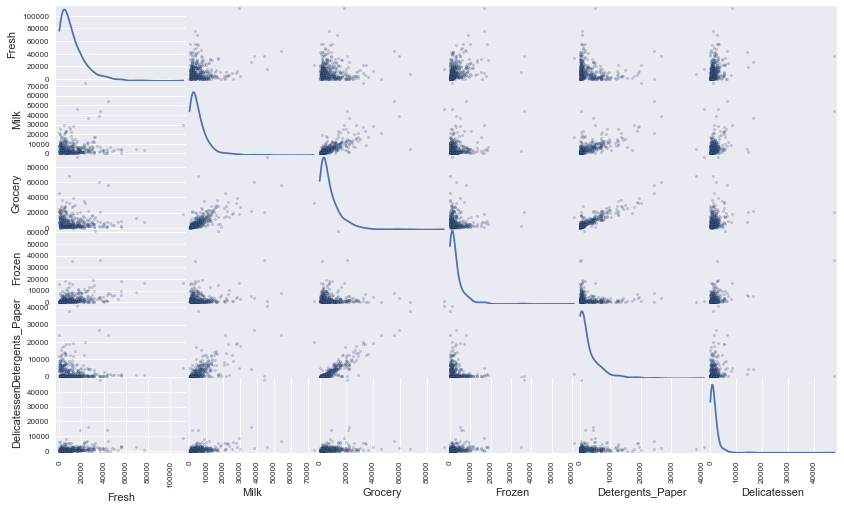

In [81]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

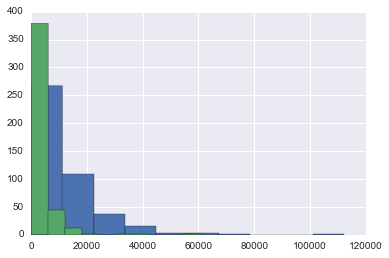

In [82]:
data['Fresh'].hist()
data['Frozen'].hist()

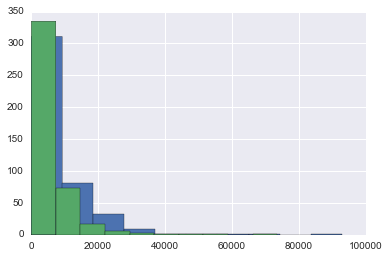

In [83]:
data['Grocery'].hist()
data['Milk'].hist()

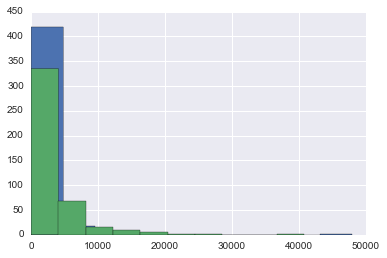

In [84]:
data['Delicatessen'].hist()
data['Detergents_Paper'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1267970d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121ee2850>]], dtype=object)

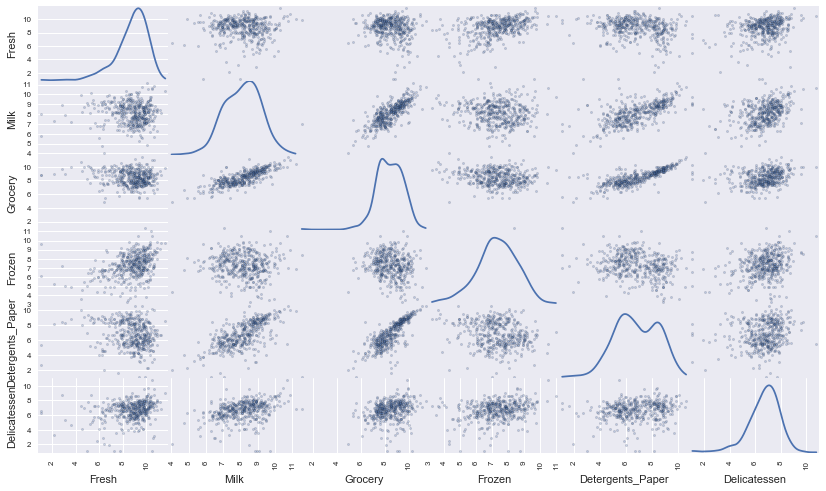

In [85]:
log_data = np.log(data)
log_samples = np.log(samples)
pd.scatter_matrix(log_data, alpha = 0.3,figsize = (14,8), diagonal = 'kde')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

###  **Answer to Q3:**
  
***
There is a certain alternative relationship between Grocery and Detergents_Paper.

The reason has shown in the previous section Q2.

And the scatter matrix prove my judgement about it.

According to these hist plot , these six features lie in a positively(right) skewed distribution.


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

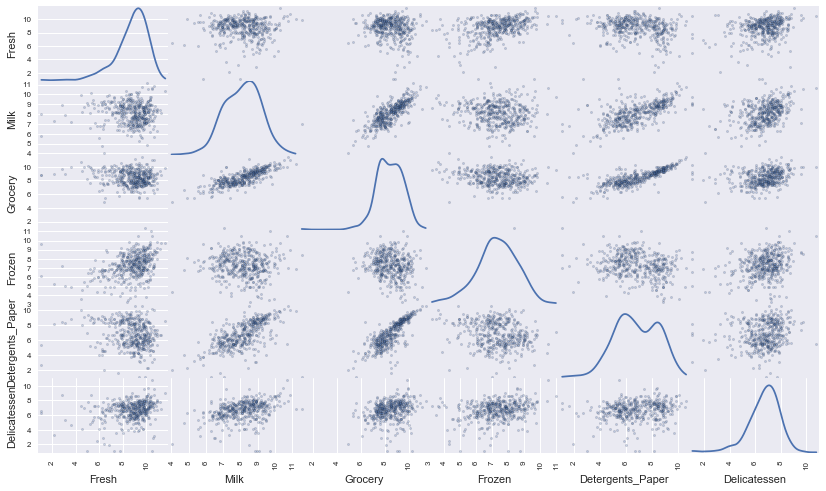

In [86]:
import pandas as pd
import numpy as np

# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [87]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
1,8.743372,6.998510,7.590852,8.258422,6.411818,7.678789
2,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [88]:
# For each feature find the data points with extreme high or low values
outlier_index = []
    
for feature in log_data.keys():
   
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(a = log_data[feature], q = 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(a = log_data[feature], q = 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outlier_data = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outlier_data)
    outlier_index.extend(outlier_data.index)
    
# OPTIONAL: Select the indices for data points you wish to remove

outliers  = [75,86,95,161,183,325,338]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [89]:
# This select function is not better than my manual selection when comparing the pca.explained_variance_ratio

## outlier_index contains all the outliers.
## Now I will select the repeated outliers to get the outliers list.

outs = []
for item in outlier_index:
    if outlier_index.count(item) > 1:
        outs.append(item)
        
print("Observations with more than one Tukey outlier:")
set(outs)

#Observations with more than one Tukey outlier:
#Out[255]:
#{65, 66, 75, 128, 154}

Observations with more than one Tukey outlier:


{65, 66, 75, 128, 154}

### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

In [90]:
#Mannual Analysis for getting  the best outliers list:

outliers_Fresh = [65,66,81,95,96,128,171,193,218,304,305,338,353,355,357,412]

outliers_Milk = [86,98,154,356]

outliers_Grocery = [75,154]

outliers_Frozen = [38,57,65,145,175,264,325,420,429,439]

outliers_Detergents_Paper = [75,161]

outliers_Delicatessen = [66,109,128,137,142,154,183,184,187,203,233,285,289,343]


**Answer:**
The common outliers between 'Fresh' and 'Frozen' is **65**

The common outliers between 'Fresh' and 'Delicatessen' is **66,128** 

The common outliers between 'Milk' , 'Grocery' and 'Delicatessen' is **154**

The common outliers between 'Grocery' and 'Detergents_Paper' is **75** 

#### The mentioned outliers point are considered for more than one feature which should be removed from the dataset.

**95,338** is the outlier of Fresh which should be removed because of the lowest points comparing with others.

**86** is the outlier of Milk which should be removed because of the highest point comparing with others.

**75** is the outlier of Grocery which should be removed because of the lowest point comparing with others.

**325** is the outlier of Frozen which should be removed because of the highest point comparing with others.

**75,161** is the outlier of Detergents_Paper which should be removed because of the lowest point comparing with others.

**183** is the outlier of Delicatessen which should be removed because of the highest point comparing with others.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

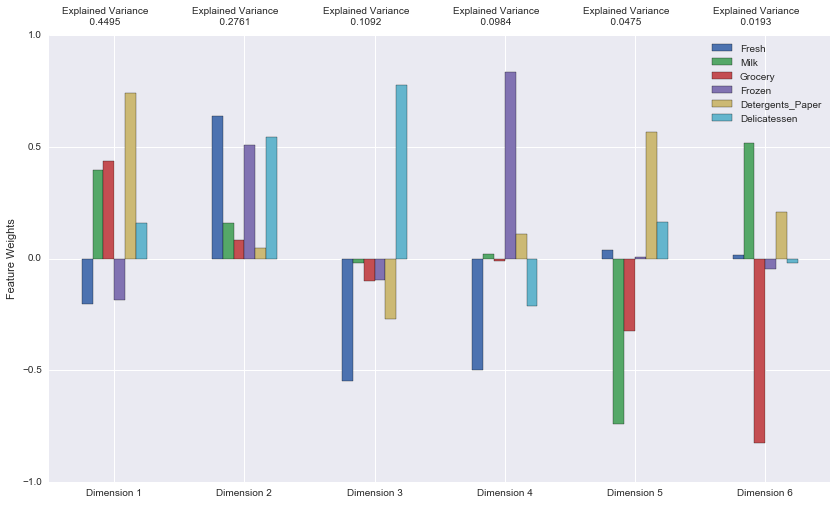

In [91]:
from sklearn.decomposition import PCA

# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components = 6)
pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

In [92]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.44948525,  0.72562528,  0.8348228 ,  0.93320092,  0.98067524,  1.        ])

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The explained variance of the first and second principal component is  0.7256.

The explained variance of the first four principal components include 'Milk','Grocery','Detergents_Paper' and 'Delicatessen' is 0.9332.

####  Dimension 1 represents a retail/supermarket :

As is shown in the visualization, there's a significant positive weight placed on Detergents_Paper with high weight on Milk and Grocery.

So Dimension 1 is best categorized by customer spending on retail goods or supermarket.

####  Dimension 2 represents a restaurant :

Fresh,Frozen and Delicatessen play the main role in  dimension 2.
Most spending on these in a commercial establishment is always considered as a restaurant or food store.

####  Dimension 3 represents a  store where only sells delicatessen :

There's only one significant  positive weight placed on Delicatessen.
It is obviously that this Dimension 3 is likely to be categoried as a delicatessen store.


####  Dimension 4 represents a  store where only sells Frozen :

The same reason as the dimension 3 judgement, Dimension 4 is best categorized a Frozen store.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [93]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.1839,1.4850,0.2955,0.6041,0.6356,-0.6433
1,-1.1396,0.7837,0.9320,0.5391,1.0494,-0.0154
2,3.6149,-2.3495,4.2842,2.5557,0.0843,-0.3285


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [94]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)
# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [95]:
reduced_data.head()

,Dimension 1,Dimension 2
0,1.724103,0.032304
1,1.763361,0.917573
2,1.874000,1.786714
3,-1.183877,1.484983
4,0.732046,2.503678


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [96]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.1839,1.4850
1,-1.1396,0.7837
2,3.6149,-2.3495


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

  #### K-Means
 K-Means is a fast but not simple algorithm which often considered to be similar of "linear" complexity (O(nkt)).
 And also it has a high efficiency and scalability for big data.Its a hard assignment.
 
 #### Gaussian Mixture Model clustering algorithm
 In statistics, a mixture model is a probabilistic model for representing the presence of subpopulations within an overall population, without requiring that an observed data set should identify the sub-population to which an individual observation belongs. Formally a mixture model corresponds to the mixture distribution that represents the probability distribution of observations in the overall population.
 And also, GMM is  a soft assignment which will be good practice in clustering the category of customers.Because the customer will be more than one type in this case with similar spending data.
 
In conclusion, I will choose the GMM as a proper solution.


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [97]:
## quantify the "goodness" of a clustering by calculating each data point's silhouette coefficient.

In [98]:
from sklearn import mixture
from sklearn.metrics import silhouette_score

g = mixture.GMM(n_components = 2, n_iter = 100, n_init = 1, random_state = 0)

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = g.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

score

0.40364883982277838

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

In [99]:
from sklearn import mixture
from sklearn.metrics import silhouette_score

def gmm(n_components,random_state):
    g = mixture.GMM(n_components = n_components, n_iter = 100, n_init = 1, random_state = random_state)
    clusterer = g.fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.means_
    score = silhouette_score(reduced_data, preds)
    sample_preds = clusterer.predict(pca_samples)
    
    return preds, centers, score, sample_preds

In [100]:
from sklearn import mixture
from sklearn.metrics import silhouette_score
for i in range(2,7):
    gmm(i,0)
    print 'When the n_components = {} ,the silhouette_score of GMM is {}'.format(i, gmm(i,0)[2])

When the n_components = 2 ,the silhouette_score of GMM is 0.403648839823
When the n_components = 3 ,the silhouette_score of GMM is 0.382318089382
When the n_components = 4 ,the silhouette_score of GMM is 0.334987105296
When the n_components = 5 ,the silhouette_score of GMM is 0.269576078577
When the n_components = 6 ,the silhouette_score of GMM is 0.285893619875


**Answer:**

As the print above we can see, the best silhoueette score is 0.4036 when the number of clusters is 2.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

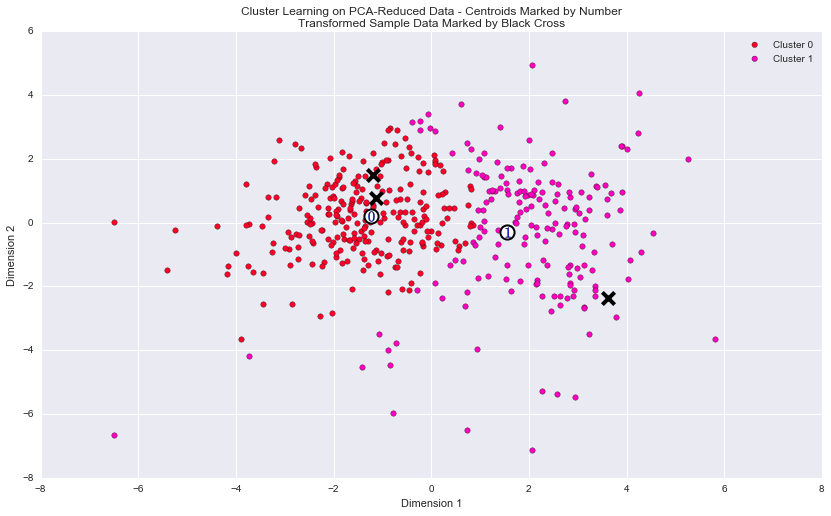

In [101]:
# Display the results of the clustering from implementation
preds = gmm(2,0)[0]
centers = gmm(2,0)[1]
sample_preds = gmm(2,0)[3]
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [102]:
reduced_data[:5]

,Dimension 1,Dimension 2
0,1.724103,0.032304
1,1.763361,0.917573
2,1.874000,1.786714
3,-1.183877,1.484983
4,0.732046,2.503678


In [103]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9348.0,2128.0,2783.0,2043.0,373.0,716.0
Segment 1,3840.0,5952.0,9069.0,945.0,2859.0,849.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

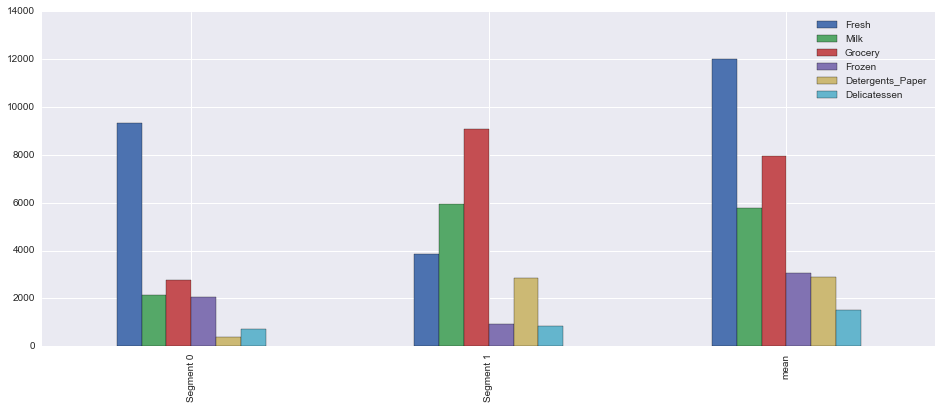

In [104]:
import seaborn as sns
true_centers = true_centers.append(data.describe().loc['mean'])
_ = true_centers.plot(kind = 'bar', figsize = (16, 6))

## **Answer:**

#### According to the bar graph collection , each spending on the six categories can be obviously comparing with  the mean spending in the whole dataset.


### Segment 0 represents a restaurant :

Because the spending of 'Fresh' and 'Frozen' are the principal part of the total cost.Eating is the main cost in this establishment.

### Segment 1 represents a supermarket :

Because the main spending of the establishment is grocery, Milk, fresh and detergents_paper which meaning the sales place most likely be a super-market. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [105]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,13265,1196,4221,6404,507,1788
1,6269,1095,1980,3860,609,2162
2,18,7504,15205,1285,4797,6372


In [106]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [112]:
sample_preds

array([0, 0, 1])

**Answer:**

Sample 0 and 1 are belong to segment 0.
Because the spending on Fresh and Frozen are their main part of total spending.

Sample 2 belongs to segment 1 which representing a supermarket,according to grocery as the big sales.


## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

### Abstract：

We can introduce the A/B tests to know the different delivery service effects on the sales and finally apply different delivery service for target customers to achieve optimal efficiency.


5days a week of the delivery serive can be applied in A group and 3days... applied in B group.

The sales change between A and B could offer some effective juddgment basis.

### How to divide A/B group :

Dividing A and B group is abiding by some rules
  (1. Divide a region into A part and B part.
  Suppose the sales of customers in this region is mean distribution)
  
or(2. A/B test can also be conducted only on one cluster ,one subset(A) of this cluster could apply 5days delivery service
while another subset(B) of this cluser implies 3days delivery service.

The monthly data between A and B will give us some effective inspiration. )

Finally, we will find  the best customized express service for different customers based on cost effectiveness.


### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the clustering data you've found to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**





### Review our previous steps:

After dropping these outliers, good_data is ready.

First, we get the reduced_data from PCA.fit_transform(good_data) .

Second,Mixture.GMM can maked a preds for the reduced_data.

To find what is the best n_components for GMM, we use silhouette score to make a test.

And the result shows that 2 is the best param for n_components of GMM .

Third, the selected samples have a prediction by the trained GMM.

The sample_preds proved the previous guess which was correct.


### The segments from GMM can be the target features.

At last,We have made two segment as target labels for the customers.
GMM method offer each subsequent data a target label,which is the wanted input feature for the supervised learner.

Spliting the train and test data from the whole dataset.

Training a DecisionTree regressor(or others) for the data can be the last step for the supervised learner.


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

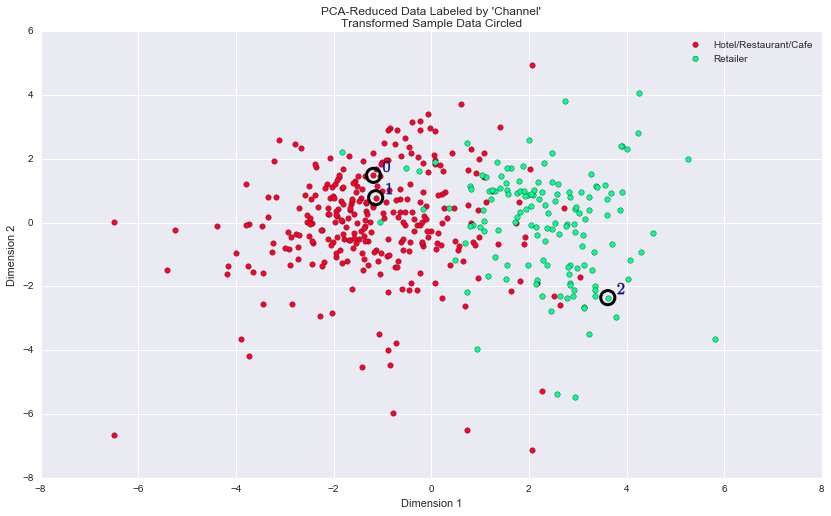

In [107]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

By reintroducing the 'Channel' feature to the dataset, we can find that it get the same performance comparing with before which meaning the two clusters predicted before still played the great role.

According to the above visualization plot, there's a few error in the classification. The two clusters and GMM algorithm have made a good job.


In most cases， these classifications are considered as consistent with my previous definition of the customer segments .

Because cluster 0 could represent a hotel or a restaurant or cafe while cluster 1 representing a retail/supermarket.

Owing to the soft assignment, we could make hotel,restaurant and cafe the similar category of the customer with  little error rate.

As regards to practice,  the data productor often share some similar categories.

The soft assignment(GMM) has a better adaption to the reality comparing with the hard assignment(K-Means).




> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.